Decision Tree Metrics:
            Metric  Before CV  After CV
0         Accuracy   0.887097  0.978711
1  Precision (YES)   0.000000  1.000000
2   Precision (NO)   0.000000  0.960386
3     Recall (YES)   0.000000  0.957475
4      Recall (NO)   0.000000  1.000000
5   F1-score (YES)   0.000000  0.977893
6    F1-score (NO)   0.000000  0.979467

Random Forest Metrics:
            Metric  Before CV  After CV
0         Accuracy   0.903226  0.978768
1  Precision (YES)   0.000000  1.000000
2   Precision (NO)   0.000000  0.959490
3     Recall (YES)   0.000000  0.957586
4      Recall (NO)   0.000000  1.000000
5   F1-score (YES)   0.000000  0.978252
6    F1-score (NO)   0.000000  0.979255

Backpropagation Metrics:
            Metric     Value
0         Accuracy  0.725806
1  Precision (YES)  0.916667
2   Precision (NO)  0.071429
3     Recall (YES)  0.771930
4      Recall (NO)  0.200000
5   F1-score (YES)  0.838095
6    F1-score (NO)  0.105263

Perceptron Metrics:
            Metric     Value
0    

C:\Users\larin\AppData\Local\Temp\ipykernel_20984\928219635.py:292: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, j], x=data[metric][i], y=['YES', 'NO'], palette=colors, orient='h', linewidth=0.3)
C:\Users\larin\AppData\Local\Temp\ipykernel_20984\928219635.py:292: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, j], x=data[metric][i], y=['YES', 'NO'], palette=colors, orient='h', linewidth=0.3)
C:\Users\larin\AppData\Local\Temp\ipykernel_20984\928219635.py:292: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, j], x=

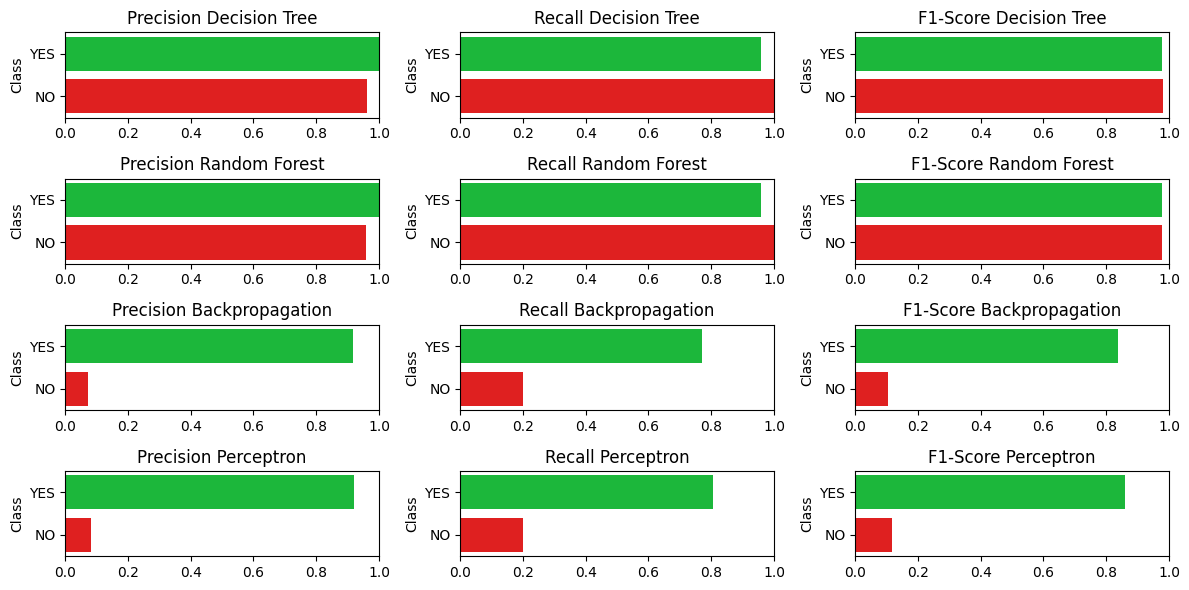



                  Feature  Importance
1                     AGE    0.188115
8       ALCOHOL CONSUMING    0.132386
11  SWALLOWING DIFFICULTY    0.113546
3          YELLOW_FINGERS    0.084138
9                COUGHING    0.073020
10    SHORTNESS OF BREATH    0.066702
6         CHRONIC DISEASE    0.064660
5           PEER_PRESSURE    0.059993
4                 ANXIETY    0.057162
7                WHEEZING    0.054585
12             CHEST PAIN    0.044543
2                 SMOKING    0.031001
0                  GENDER    0.030149


Feature Importance (Decision Tree):
GENDER: 0.007604562737642584
AGE: 0.12107998229904221
SMOKING: 0.0033269961977186236
YELLOW_FINGERS: 0.22284063291680953
ANXIETY: 0.057324734419105794
PEER_PRESSURE: 0.07732355079023946
CHRONIC DISEASE: 0.06922304697100722
WHEEZING: 0.000990177439797187
ALCOHOL CONSUMING: 0.20484619944803778
COUGHING: 0.0010844296239062483
SHORTNESS OF BREATH: 0.10354156032837677
SWALLOWING DIFFICULTY: 0.07502597626271135
CHEST PAIN: 0.05578

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn2pmml import PMMLPipeline, sklearn2pmml
from sklearn.tree import _tree

####################################################################################################################################################

# Suppress convergence warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

####################################################################################################################################################

# Load the dataset
data = pd.read_csv('survey lung cancer.csv', encoding='latin1')

####################################################################################################################################################

# Preprocessing step

# Remove rows with missing values
data.dropna(inplace=True)

# Remove non-numeric columns
numeric_data = data.select_dtypes(include='number')

# Remove outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Perform label encoding for 'GENDER' column
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

# Feature selection
selected_columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                    'CHRONIC DISEASE', 'WHEEZING', 'ALCOHOL CONSUMING', 
                    'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 
                    'LUNG_CANCER']
data = data[selected_columns]

# Define features (X) and target variable (y)
X = data.drop(columns=['LUNG_CANCER']) 
y = data['LUNG_CANCER']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####################################################################################################################################################

# Balancing

# Perform balancing (oversampling and undersampling)
oversampler = RandomOverSampler(sampling_strategy='minority')
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = oversampler.fit_resample(X_train, y_train)
X_balanced, y_balanced = undersampler.fit_resample(X_over, y_over)

####################################################################################################################################################

# Algorithms before balancing

# Decision Tree before balancing
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)

# Random Forest before balancing
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

####################################################################################################################################################

# Custom Metrics

# Define a function to calculate accuracy
def custom_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Define a function to calculate precision for both classes
def custom_precision(y_true, y_pred, class_label):
    return precision_score(y_true, y_pred, pos_label=class_label)

# Define a function to calculate recall for both classes
def custom_recall(y_true, y_pred, class_label):
    return recall_score(y_true, y_pred, pos_label=class_label)

# Define a function to calculate the F1-score for both classes
def custom_f1(y_true, y_pred, class_label):
    return f1_score(y_true, y_pred, pos_label=class_label)

# Define the scorers for the custom metrics
scoring = {
    'accuracy': make_scorer(custom_accuracy),
    'precision_yes': make_scorer(custom_precision, class_label='YES'),
    'precision_no': make_scorer(custom_precision, class_label='NO'),
    'recall_yes': make_scorer(custom_recall, class_label='YES'),
    'recall_no': make_scorer(custom_recall, class_label='NO'),
    'f1_yes': make_scorer(custom_f1, class_label='YES'),
    'f1_no': make_scorer(custom_f1, class_label='NO')
}

####################################################################################################################################################

# Cross-validation for algorithms

# Cross-validation for Decision Tree
dt_cv_results = cross_validate(dt_classifier, X_balanced, y_balanced, cv=5, scoring=scoring)

# Cross-validation for Random Forest
rf_cv_results = cross_validate(rf_classifier, X_balanced, y_balanced, cv=5, scoring=scoring)

####################################################################################################################################################

# Calculating metrics before and after cross-validation

# Calculate the means of the metrics during cross-validation
dt_cv_accuracy = dt_cv_results['test_accuracy'].mean()
dt_cv_precision_yes = dt_cv_results['test_precision_yes'].mean()
dt_cv_precision_no = dt_cv_results['test_precision_no'].mean()
dt_cv_recall_yes = dt_cv_results['test_recall_yes'].mean()
dt_cv_recall_no = dt_cv_results['test_recall_no'].mean()
dt_cv_f1_yes = dt_cv_results['test_f1_yes'].mean()
dt_cv_f1_no = dt_cv_results['test_f1_no'].mean()

rf_cv_accuracy = rf_cv_results['test_accuracy'].mean()
rf_cv_precision_yes = rf_cv_results['test_precision_yes'].mean()
rf_cv_precision_no = rf_cv_results['test_precision_no'].mean()
rf_cv_recall_yes = rf_cv_results['test_recall_yes'].mean()
rf_cv_recall_no = rf_cv_results['test_recall_no'].mean()
rf_cv_f1_yes = rf_cv_results['test_f1_yes'].mean()
rf_cv_f1_no = rf_cv_results['test_f1_no'].mean()

# Create DataFrames to store the metrics
dt_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (YES)', 'Precision (NO)', 'Recall (YES)', 'Recall (NO)', 'F1-score (YES)', 'F1-score (NO)'],
    'Before CV': [accuracy_score(y_test, dt_y_pred)] + [0]*6,
    'After CV': [dt_cv_accuracy, dt_cv_precision_yes, dt_cv_precision_no, dt_cv_recall_yes, dt_cv_recall_no, dt_cv_f1_yes, dt_cv_f1_no]
})

rf_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (YES)', 'Precision (NO)', 'Recall (YES)', 'Recall (NO)', 'F1-score (YES)', 'F1-score (NO)'],
    'Before CV': [accuracy_score(y_test, rf_y_pred)] + [0]*6,
    'After CV': [rf_cv_accuracy, rf_cv_precision_yes, rf_cv_precision_no, rf_cv_recall_yes, rf_cv_recall_no, rf_cv_f1_yes, rf_cv_f1_no]
})

# Display the DataFrames
print("Decision Tree Metrics:")
print(dt_metrics)

print("\nRandom Forest Metrics:")
print(rf_metrics)

####################################################################################################################################################

# Algorithms after balancing

# Decision Tree after balancing
dt_classifier_balanced = DecisionTreeClassifier()
dt_classifier_balanced.fit(X_balanced, y_balanced)
dt_y_pred_balanced = dt_classifier_balanced.predict(X_test)

# Random Forest after balancing
rf_classifier_balanced = RandomForestClassifier()
rf_classifier_balanced.fit(X_balanced, y_balanced)
rf_y_pred_balanced = rf_classifier_balanced.predict(X_test)

####################################################################################################################################################

# Calculating metrics after balancing

# Calculate metrics for Decision Tree after balancing
dt_recall_yes = recall_score(y_test, dt_y_pred_balanced, pos_label='YES')
dt_recall_no = recall_score(y_test, dt_y_pred_balanced, pos_label='NO')
dt_f1_yes = f1_score(y_test, dt_y_pred_balanced, pos_label='YES')
dt_f1_no = f1_score(y_test, dt_y_pred_balanced, pos_label='NO')
dt_precision_yes = precision_score(y_test, dt_y_pred_balanced, pos_label='YES')
dt_precision_no = precision_score(y_test, dt_y_pred_balanced, pos_label='NO')

# Calculate metrics for Random Forest after balancing
rf_recall_yes = recall_score(y_test, rf_y_pred_balanced, pos_label='YES')
rf_recall_no = recall_score(y_test, rf_y_pred_balanced, pos_label='NO')
rf_f1_yes = f1_score(y_test, rf_y_pred_balanced, pos_label='YES')
rf_f1_no = f1_score(y_test, rf_y_pred_balanced, pos_label='NO')
rf_precision_yes = precision_score(y_test, rf_y_pred_balanced, pos_label='YES')
rf_precision_no = precision_score(y_test, rf_y_pred_balanced, pos_label='NO')

# Decision Tree metrics
dt_metrics = [accuracy_score(y_test, dt_y_pred_balanced), dt_precision_yes, dt_precision_no, dt_recall_yes, dt_recall_no, dt_f1_yes, dt_f1_no]
dt_labels = ['Accuracy', 'Precision (YES)', 'Precision (NO)', 'Recall (YES)', 'Recall (NO)', 'F1-score (YES)', 'F1-score (NO)']

# Random Forest metrics
rf_metrics = [accuracy_score(y_test, rf_y_pred_balanced), rf_precision_yes, rf_precision_no, rf_recall_yes, rf_recall_no, rf_f1_yes, rf_f1_no]
rf_labels = ['Accuracy', 'Precision (YES)', 'Precision (NO)', 'Recall (YES)', 'Recall (NO)', 'F1-score (YES)', 'F1-score (NO)']

####################################################################################################################################################

# Implementing Backpropagation using a simple neural network

# Initialize the neural network with 1 hidden layer of 10 neurons
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_classifier.fit(X_balanced, y_balanced)
mlp_y_pred = mlp_classifier.predict(X_test)

# Metrics for Backpropagation
mlp_recall_yes = recall_score(y_test, mlp_y_pred, pos_label='YES')
mlp_recall_no = recall_score(y_test, mlp_y_pred, pos_label='NO')
mlp_f1_yes = f1_score(y_test, mlp_y_pred, pos_label='YES')
mlp_f1_no = f1_score(y_test, mlp_y_pred, pos_label='NO')
mlp_precision_yes = precision_score(y_test, mlp_y_pred, pos_label='YES')
mlp_precision_no = precision_score(y_test, mlp_y_pred, pos_label='NO')

# Implementing Perceptron

# Define the Perceptron classifier
perceptron_classifier = MLPClassifier(hidden_layer_sizes=(), max_iter=1000, random_state=42)
perceptron_classifier.fit(X_balanced, y_balanced)
perceptron_y_pred = perceptron_classifier.predict(X_test)

# Metrics for the Perceptron
perceptron_recall_yes = recall_score(y_test, perceptron_y_pred, pos_label='YES')
perceptron_recall_no = recall_score(y_test, perceptron_y_pred, pos_label='NO')
perceptron_f1_yes = f1_score(y_test, perceptron_y_pred, pos_label='YES')
perceptron_f1_no = f1_score(y_test, perceptron_y_pred, pos_label='NO')
perceptron_precision_yes = precision_score(y_test, perceptron_y_pred, pos_label='YES')
perceptron_precision_no = precision_score(y_test, perceptron_y_pred, pos_label='NO')

# Backpropagatiom metrics
mlp_metrics = [accuracy_score(y_test, mlp_y_pred), mlp_precision_yes, mlp_precision_no, mlp_recall_yes, mlp_recall_no, mlp_f1_yes, mlp_f1_no]
mlp_labels = ['Accuracy', 'Precision (YES)', 'Precision (NO)', 'Recall (YES)', 'Recall (NO)', 'F1-score (YES)', 'F1-score (NO)']

# Backpropagation metrics
mlp_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (YES)', 'Precision (NO)', 'Recall (YES)', 'Recall (NO)', 'F1-score (YES)', 'F1-score (NO)'],
    'Value': mlp_metrics
})

# Perceptron metrics
perceptron_metrics = [accuracy_score(y_test, perceptron_y_pred), perceptron_precision_yes, perceptron_precision_no, perceptron_recall_yes, perceptron_recall_no, perceptron_f1_yes, perceptron_f1_no]
perceptron_labels = ['Accuracy', 'Precision (YES)', 'Precision (NO)', 'Recall (YES)', 'Recall (NO)', 'F1-score (YES)', 'F1-score (NO)']

# Perceptron metrics
perceptron_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (YES)', 'Precision (NO)', 'Recall (YES)', 'Recall (NO)', 'F1-score (YES)', 'F1-score (NO)'],
    'Value': perceptron_metrics
})

print("\nBackpropagation Metrics:")
print(mlp_metrics_df)

print("\nPerceptron Metrics:")
print(perceptron_metrics_df)

####################################################################################################################################################

# Plotting the results
fig, axes = plt.subplots(4, 3, figsize=(12, 6))

# Metrics and models
metrics = ['Precision', 'Recall', 'F1-Score']
models = ['Decision Tree', 'Random Forest', 'Backpropagation', 'Perceptron']

# Colors for YES and NO
colors = ['#02D12B', '#FF0000']

# Data for precision and recall
data = {
    'Precision': [[dt_cv_precision_yes, dt_cv_precision_no], [rf_cv_precision_yes, rf_cv_precision_no], [mlp_precision_yes, mlp_precision_no], [perceptron_precision_yes, perceptron_precision_no]],
    'Recall': [[dt_cv_recall_yes, dt_cv_recall_no], [rf_cv_recall_yes, rf_cv_recall_no], [mlp_recall_yes, mlp_recall_no], [perceptron_recall_yes, perceptron_recall_no]],
    'F1-Score': [[dt_cv_f1_yes, dt_cv_f1_no], [rf_cv_f1_yes, rf_cv_f1_no], [mlp_f1_yes, mlp_f1_no], [perceptron_f1_yes, perceptron_f1_no]]
}

# Plotting
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        sns.barplot(ax=axes[i, j], x=data[metric][i], y=['YES', 'NO'], palette=colors, orient='h', linewidth=0.3)
        axes[i, j].set_title(f'{metric} {model}')
        axes[i, j].set_ylabel('Class')
        axes[i, j].set_xlim(0, 1)

plt.tight_layout()
plt.savefig('images\metrics.png')
plt.show()

####################################################################################################################################################

# Save the model as PMML
pipeline = PMMLPipeline([("classifier", rf_classifier_balanced)])
sklearn2pmml(pipeline, "rf_classifier_balanced.pmml")

# Get feature importances from Random Forest
def get_feature_importances(model, feature_names):
    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    return importance_df.sort_values(by='Importance', ascending=False)

# Get feature importances
feature_importances_df = get_feature_importances(rf_classifier_balanced, X.columns)
print("\n")
print(feature_importances_df)
print("\n")

####################################################################################################################################################

# Calculating Feature Importance

# Decision Tree
feature_importance_dt = dt_classifier_balanced.feature_importances_
print("Feature Importance (Decision Tree):")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importance_dt[i]}")

# Random Forest
feature_importance_rf = rf_classifier_balanced.feature_importances_
print("\nFeature Importance (Random Forest):")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importance_rf[i]}")

# MLP Classifier
# Weights between the input layer and the first hidden layer
input_weights_mlp = mlp_classifier.coefs_[0]

# Calculating feature importance as the average of the weights for each feature
feature_importance_mlp = np.mean(np.abs(input_weights_mlp), axis=1)

print("\nFeature Importance (Backpropagation - MLP):")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importance_mlp[i]}")

# Perceptron
# Weights between the input layer and the output layer
input_weights_perceptron = perceptron_classifier.coefs_[0]

# Calculating feature importance as the average of the weights for each feature
feature_importance_perceptron = np.mean(np.abs(input_weights_perceptron), axis=1)

print("\nFeature Importance (Perceptron):")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importance_perceptron[i]}")
